<img src="zc_logo.png" alt="drawing" width="100" height="100" align='center' style="float: left;" />

**University of Science and Technology UST,  Zewail City**<br>
**Communications and Information Engineering Program**<br>
**Natural Language Processing - CIE 553**<br>
**Text Classification Lab**<br>

*Name:* **Elsayed Mohammed Elsayed Mostafa**<br>
*ID:* **201700316**<br>
*E-mail:* s-ayedmmostafa@zewailcity.edy.eg<br>

## **Imports and Uploads**

In [4]:
import re
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/elsayed/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/elsayed/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
dataset = pd.read_csv('reviews.csv')
target = dataset['reviews.rating']
dataset.head()

,reviews.rating,reviews.text
0,1,This product so far has not disappointed. My c...
1,1,great for beginner or experienced person. Boug...
2,1,Inexpensive tablet for him to use and learn on...
3,1,I've had my Fire HD 8 two weeks now and I love...
4,1,I bought this for my grand daughter when she c...


## **Data Exploration**

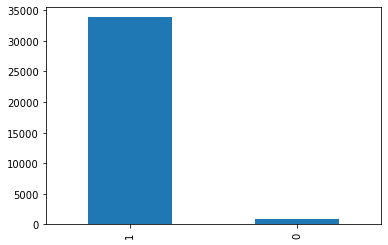

In [6]:
# Check data balance 
dataset['reviews.rating'].value_counts().plot(kind='bar');

***The data is highly unbalanced, it's highly biased towards positive values (1) and hence the results will not be accurate enough.***

## **Data pre-processing**

In [7]:
# Get the English stop words
stop_words = set(stopwords.words('english')) 
my_stopwords = stopwords.words()

# Converting to lowercase
dataset['reviews.text'] = dataset['reviews.text'].apply(lambda x: x.lower())

# Removing the stopwords from the dataset
dataset['reviews.text'] = dataset['reviews.text'].apply(lambda x: ' '.join([item for item in word_tokenize(x) if item not in my_stopwords]))

#dataset['reviews.text'] = dataset['reviews.text'].apply(lambda x: " ".join(x))
features = dataset['reviews.text']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Count Vectorize
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

# Transform the training data
vector = vectorizer.transform(X_train)
X_train = vector.toarray()

# Transform the test data
vector = vectorizer.transform(X_test)
X_test = vector.toarray()

In [8]:
dataset.head()

,reviews.rating,reviews.text
0,1,product far disappointed . children love use l...
1,1,great beginner experienced person . bought gif...
2,1,"inexpensive tablet use learn , step nabi . thr..."
3,1,'ve fire hd 8 two weeks love . tablet great va...
4,1,"bought grand daughter comes visit . set user ,..."


# **Naive Bayes Model**

In [9]:
# Apply the classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

## **Prediction**

In [10]:
#Let's predict
y_train_predicted = gnb.predict(X_train)
y_test_predicted = gnb.predict(X_test)

## **Evaluation**

In [11]:
print(f'f1 score = {f1_score(y_train, y_train_predicted)}')
print(f'precision = {precision_score(y_train, y_train_predicted)}')
print(f'recall = {recall_score(y_train, y_train_predicted)}')

f1 score = 0.755485101201553
precision = 1.0
recall = 0.6070518737308473


In [12]:
print(f'f1 score = {f1_score(y_test, y_test_predicted)}')
print(f'precision = {precision_score(y_test, y_test_predicted)}')
print(f'recall = {recall_score(y_test, y_test_predicted)}')

f1 score = 0.7103681442524418
precision = 0.9732372619660319
recall = 0.5593019816622301


In [13]:
test_case = ['the food is good and the price is great']
vector = vectorizer.transform(test_case)
vectorized_test = vector.toarray()
print(gnb.predict(vectorized_test))

[1]


**The resualtant percision, recall, f1-score are not efficient and that's mainly due to the extremely ubnablanced dataset.**  <br> 
I'm going to try bagging in order to partially compenstane the unbalanced dataset.

# **Bagging with Naive Bayes Model**

In [ ]:
#Create an object of the classifier.
bbc = BaggingClassifier(base_estimator=GaussianNB(),
                                n_estimators=10,
                                bootstrap=False)

#Train the classifier.
bbc.fit(X_train, y_train);

In [ ]:
#Let's predict
y_train_predicted = bbc.predict(X_train)
y_test_predicted = bbc.predict(X_test)
print(classification_report(y_train, y_train_predicted))
print(classification_report(y_test, y_test_predicted))

**By using bagging, we obviously increased the model accuracy.**

# **Logisitc Regression Model**

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Let's predict
y_train_predicted = clf.predict(X_train)
y_test_predicted = clf.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.98      0.59      0.74       658
           1       0.99      1.00      0.99     27069

    accuracy                           0.99     27727
   macro avg       0.99      0.80      0.87     27727
weighted avg       0.99      0.99      0.99     27727



In [ ]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.41      0.20      0.27       154
           1       0.98      0.99      0.99      6778

    accuracy                           0.98      6932
   macro avg       0.69      0.60      0.63      6932
weighted avg       0.97      0.98      0.97      6932

